<a href="https://colab.research.google.com/github/Ankit9721/Ankit9721/blob/main/cnn_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"

#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')
#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')


#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [9]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names)

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names)

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names)

test_normal_names = os.listdir(test_normal_dir)
print(test_covid_names)

['COVID19(336).jpg', 'COVID19(489).jpg', 'COVID19(357).jpg', 'COVID19(252).jpg', 'COVID19(377).jpg', 'COVID19(407).jpg', 'COVID-19 (331).jpg', 'COVID19(83).jpg', 'COVID19(454).jpg', 'COVID19(191).jpg', 'COVID19(309).jpg', 'COVID19(531).jpg', 'COVID-19 (1).png', 'COVID19(520).jpg', 'COVID19(297).jpg', 'COVID19(44).jpg', 'COVID19(525).jpg', 'COVID19(154).jpg', 'COVID-19 (52).jpg', 'COVID19(356).jpg', 'COVID19(132).jpg', 'COVID19(402).jpg', 'COVID19(27).jpg', 'COVID-19 (299).jpg', 'COVID19(264).jpg', 'COVID19(102).jpg', 'COVID19(453).jpg', 'COVID19(312).jpg', 'COVID19(112).jpg', 'COVID19(511).jpg', 'COVID-19 (34).jpg', 'COVID-19 (9).jpeg', 'COVID19(203).jpg', 'COVID19(91).jpg', 'COVID19(370).jpg', 'COVID19(310).jpg', 'COVID19(445).jpg', 'COVID19(46).jpg', 'COVID19(574).jpg', 'COVID19(249).jpg', 'COVID19(136).jpg', 'COVID19(268).jpg', 'COVID19(169).jpg', 'COVID19(12).jpg', 'COVID19(567).jpg', 'COVID19(535).jpg', 'COVID19(509).jpg', 'COVID19(99).jpg', 'COVID19(288).jpg', 'COVID-19 (23).jpeg

In [10]:
#print the total no of images present in each dir
print("Total number of images present in Train Dataset :", len(train_covid_names+train_normal_names))

print("Total number of images present in Test Dataset :", len(test_covid_names+test_normal_names))

Total number of images present in Train Dataset : 1811
Total number of images present in Test Dataset : 484


['/content/datasets/Data/train/COVID19/COVID19(500).jpg', '/content/datasets/Data/train/COVID19/COVID19(292).jpg', '/content/datasets/Data/train/COVID19/COVID19(557).jpg', '/content/datasets/Data/train/COVID19/COVID19(534).jpg', '/content/datasets/Data/train/COVID19/COVID19(97).jpg', '/content/datasets/Data/train/COVID19/COVID19(40).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (10).jpeg', '/content/datasets/Data/train/COVID19/COVID19(326).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(671).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(451).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1310).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(5).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(729).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(66).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1314).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(346).jpg']


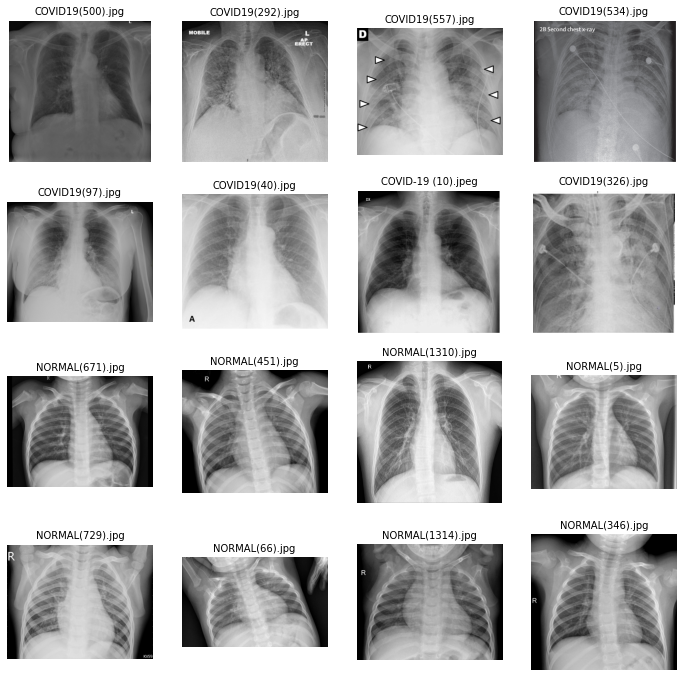

In [ ]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg

#set the number of columns and rows
rows = 4
cols = 4

#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)

#get the filenames from the covid & normal dir of the train dataset
covid_pics = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pics = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

#print the list
print(covid_pics)
print(normal_pics)

#merge the covid and normal list
merged_list = covid_pics + normal_pics
for i,img_path in enumerate(merged_list):
  data = img_path.split('/',6)[6]
  sp = plt.subplot(rows,cols, i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize= 10)
  plt.imshow(img, cmap='gray')

plt.show()

In [11]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale= 1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 1811 images belonging to 2 classes.


In [14]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [15]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

In [16]:
#Initialize a model instannce
model = Sequential()

# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5), padding = 'SAME', activation='relu',input_shape= (150,150,3)))

# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# add another convolutional layer
model.add(Conv2D(54,(5,5), padding='SAME', activation='relu'))

# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# place a dropout layer
model.add(Dropout(0.5))

# Flatten layer
model.add(Flatten())

# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation='relu'))

# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 54)        43254     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 54)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 54)        0

In [17]:
#compile the model
model.compile(Adam(lr=0.001), loss= 'binary_crossentropy', metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [21]:
#train the model
history = model.fit(train_generator,
                    epochs = 15,
                    validation_data = validation_generator)

Epoch 1/15
46/46 [==============================] - 158s 3s/step - loss: 0.2775 - accuracy: 0.8958 - val_loss: 0.3302 - val_accuracy: 0.9309
Epoch 2/15
46/46 [==============================] - 155s 3s/step - loss: 0.1911 - accuracy: 0.9268 - val_loss: 0.1707 - val_accuracy: 0.9392
Epoch 3/15
46/46 [==============================] - 152s 3s/step - loss: 0.1452 - accuracy: 0.9503 - val_loss: 0.1701 - val_accuracy: 0.9558
Epoch 4/15
46/46 [==============================] - 152s 3s/step - loss: 0.1215 - accuracy: 0.9627 - val_loss: 0.1372 - val_accuracy: 0.9669
Epoch 5/15
46/46 [==============================] - 151s 3s/step - loss: 0.1256 - accuracy: 0.9586 - val_loss: 0.1143 - val_accuracy: 0.9613
Epoch 6/15
46/46 [==============================] - 153s 3s/step - loss: 0.1289 - accuracy: 0.9579 - val_loss: 0.1592 - val_accuracy: 0.9530
Epoch 7/15
46/46 [==============================] - 152s 3s/step - loss: 0.0988 - accuracy: 0.9689 - val_loss: 0.1304 - val_accuracy: 0.9751
Epoch 8/15
46

In [22]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

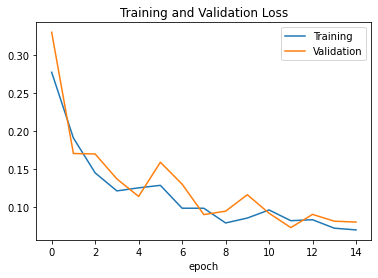

In [23]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

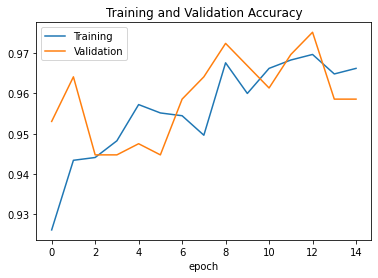

In [ ]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [24]:
# get the test acuarcy and loss
test_loss, test_acc = model.evaluate(test_generator)
print('test_loss : {}, test_accuracy :{}'.format(test_loss, test_acc))

57/57 [==============================] - 73s 1s/step - loss: 0.0609 - accuracy: 0.9834
test_loss : 0.06090237572789192, test_accuracy :0.9834345579147339


In [28]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  img = image.load_img(img_path,target_size=(150,150))
  image = image.img_to_array(img)
  image = np.expand_dims(image, axis=0)
  prediction = model.predict(image)
  print(filename)

  if prediction == 0 :
    print('covid detected')
  else:
    print('Your report is normal')

Saving E4OFggoL2vooAU0frCUSZA_Costophrenic_angle.jpg to E4OFggoL2vooAU0frCUSZA_Costophrenic_angle.jpg
E4OFggoL2vooAU0frCUSZA_Costophrenic_angle.jpg
covid detected
